In [136]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [137]:
matches=pd.read_csv('matches.csv')
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577 entries, 0 to 576
Data columns (total 18 columns):
id                 577 non-null int64
season             577 non-null int64
city               570 non-null object
date               577 non-null object
team1              577 non-null object
team2              577 non-null object
toss_winner        577 non-null object
toss_decision      577 non-null object
result             577 non-null object
dl_applied         577 non-null int64
winner             574 non-null object
win_by_runs        577 non-null int64
win_by_wickets     577 non-null int64
player_of_match    574 non-null object
venue              577 non-null object
umpire1            577 non-null object
umpire2            577 non-null object
umpire3            0 non-null float64
dtypes: float64(1), int64(5), object(12)
memory usage: 54.1+ KB


In [138]:
matches.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               3
win_by_runs          0
win_by_wickets       0
player_of_match      3
venue                0
umpire1              0
umpire2              0
umpire3            577
dtype: int64

In [139]:
#find all NaN values in winner column, so that we update this as draw
matches[pd.isnull(matches['winner'])]


,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
241,242,2011,Delhi,5/21/2011,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,no result,0,NaN,0,0,NaN,Feroz Shah Kotla,SS Hazare,RJ Tucker,NaN
486,487,2015,Bangalore,4/29/2015,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,JD Cloete,PG Pathak,NaN
511,512,2015,Bangalore,5/17/2015,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,HDPK Dharmasena,K Srinivasan,NaN


In [140]:
matches['winner'].fillna('Draw',inplace=True)

In [141]:
matches.loc[241,'winner'] 


'Draw'

In [142]:
matches.replace(['Mumbai Indians','Kolkata Knight Riders','Royal Challengers Bangalore','Deccan Chargers','Chennai Super Kings',
                 'Rajasthan Royals','Delhi Daredevils','Gujarat Lions','Kings XI Punjab',
                 'Sunrisers Hyderabad','Rising Pune Supergiants','Kochi Tuskers Kerala','Pune Warriors']
                ,['MI','KKR','RCB','DC','CSK','RR','DD','GL','KXIP','SRH','RPS','KTK','PW'],inplace=True)


matches.head(2)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2008,Bangalore,4/18/2008,KKR,RCB,RCB,field,normal,0,KKR,140,0,BB McCullum,M Chinnaswamy Stadium,Asad Rauf,RE Koertzen,NaN
1,2,2008,Chandigarh,4/19/2008,CSK,KXIP,CSK,bat,normal,0,CSK,33,0,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",MR Benson,SL Shastri,NaN


In [143]:
encode = {'team1': {'MI':1,'KKR':2,'RCB':3,'DC':4,'CSK':5,'RR':6,'DD':7,'GL':8,'KXIP':9,'SRH':10,'RPS':11,'KTK':12,'PW':13},
          'team2': {'MI':1,'KKR':2,'RCB':3,'DC':4,'CSK':5,'RR':6,'DD':7,'GL':8,'KXIP':9,'SRH':10,'RPS':11,'KTK':12,'PW':13},
          'toss_winner': {'MI':1,'KKR':2,'RCB':3,'DC':4,'CSK':5,'RR':6,'DD':7,'GL':8,'KXIP':9,'SRH':10,'RPS':11,'KTK':12,'PW':13},
          'winner': {'MI':1,'KKR':2,'RCB':3,'DC':4,'CSK':5,'RR':6,'DD':7,'GL':8,'KXIP':9,'SRH':10,'RPS':11,'KTK':12,'PW':13,'Draw':14}}
matches.replace(encode, inplace=True)
matches.head(2)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2008,Bangalore,4/18/2008,2,3,3,field,normal,0,2,140,0,BB McCullum,M Chinnaswamy Stadium,Asad Rauf,RE Koertzen,NaN
1,2,2008,Chandigarh,4/19/2008,5,9,5,bat,normal,0,5,33,0,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",MR Benson,SL Shastri,NaN


In [144]:
# Find Cities which are null
matches[pd.isnull(matches['city'])]


,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
402,403,2014,NaN,4/19/2014,1,3,3,field,normal,0,3,0,7,PA Patel,Dubai International Cricket Stadium,Aleem Dar,AK Chaudhary,NaN
403,404,2014,NaN,4/19/2014,2,7,2,bat,normal,0,7,0,4,JP Duminy,Dubai International Cricket Stadium,Aleem Dar,VA Kulkarni,NaN
407,408,2014,NaN,4/23/2014,5,6,6,field,normal,0,5,7,0,RA Jadeja,Dubai International Cricket Stadium,HDPK Dharmasena,RK Illingworth,NaN
409,410,2014,NaN,4/25/2014,10,7,10,bat,normal,0,10,4,0,AJ Finch,Dubai International Cricket Stadium,M Erasmus,S Ravi,NaN
410,411,2014,NaN,4/25/2014,1,5,1,bat,normal,0,5,0,7,MM Sharma,Dubai International Cricket Stadium,BF Bowden,M Erasmus,NaN
415,416,2014,NaN,4/28/2014,3,9,9,field,normal,0,9,0,5,Sandeep Sharma,Dubai International Cricket Stadium,BF Bowden,S Ravi,NaN
417,418,2014,NaN,4/30/2014,10,1,1,field,normal,0,10,15,0,B Kumar,Dubai International Cricket Stadium,HDPK Dharmasena,M Erasmus,NaN


In [145]:
matches['city'].fillna('Dubai',inplace=True)

In [146]:
matches.info()
matches.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577 entries, 0 to 576
Data columns (total 18 columns):
id                 577 non-null int64
season             577 non-null int64
city               577 non-null object
date               577 non-null object
team1              577 non-null int64
team2              577 non-null int64
toss_winner        577 non-null int64
toss_decision      577 non-null object
result             577 non-null object
dl_applied         577 non-null int64
winner             577 non-null int64
win_by_runs        577 non-null int64
win_by_wickets     577 non-null int64
player_of_match    574 non-null object
venue              577 non-null object
umpire1            577 non-null object
umpire2            577 non-null object
umpire3            0 non-null float64
dtypes: float64(1), int64(9), object(8)
memory usage: 63.1+ KB


,id,season,team1,team2,toss_winner,dl_applied,winner,win_by_runs,win_by_wickets,umpire3
count,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,0.0
mean,289.000000,2012.029463,5.417678,5.481802,5.365685,0.025997,5.218371,13.715771,3.363951,NaN
std,166.709828,2.486247,3.281985,3.291946,3.255295,0.159263,3.196267,23.619282,3.416049,NaN
min,1.000000,2008.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,NaN
25%,145.000000,2010.000000,3.000000,3.000000,3.000000,0.000000,2.000000,0.000000,0.000000,NaN
50%,289.000000,2012.000000,5.000000,5.000000,5.000000,0.000000,5.000000,0.000000,3.000000,NaN
75%,433.000000,2014.000000,8.000000,7.000000,7.000000,0.000000,7.000000,20.000000,6.000000,NaN
max,577.000000,2016.000000,13.000000,13.000000,13.000000,1.000000,14.000000,144.000000,10.000000,NaN


In [147]:
#team_match_total=matches.groupby(["team1"]).size()+matches.groupby(["team2"]).size()
#print(team_match_total.get_value(1))

xx=matches.groupby(["toss_winner"]).size()
print(xx.get_value(1))
yy=matches.groupby(["winner"]).size()
print(yy.get_value(1))

74
80


C:\Users\Intel\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  """
C:\Users\Intel\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  import sys


In [148]:
#we maintain a dictionary for future reference mapping teams
dicVal = encode['winner']
print(dicVal['MI']) #key value
print(list(dicVal.keys())[list(dicVal.values()).index(1)]) #find key by value search

1
MI


In [149]:
matches = matches[['team1','team2','city','toss_decision','toss_winner','venue','winner']]
matches.head(2)

,team1,team2,city,toss_decision,toss_winner,venue,winner
0,2,3,Bangalore,field,3,M Chinnaswamy Stadium,2
1,5,9,Chandigarh,bat,5,"Punjab Cricket Association Stadium, Mohali",5


In [150]:
df=pd.DataFrame(matches)
df.head(2)

,team1,team2,city,toss_decision,toss_winner,venue,winner
0,2,3,Bangalore,field,3,M Chinnaswamy Stadium,2
1,5,9,Chandigarh,bat,5,"Punjab Cricket Association Stadium, Mohali",5


In [151]:
df.describe()

,team1,team2,toss_winner,winner
count,577.000000,577.000000,577.000000,577.000000
mean,5.417678,5.481802,5.365685,5.218371
std,3.281985,3.291946,3.255295,3.196267
min,1.000000,1.000000,1.000000,1.000000
25%,3.000000,3.000000,3.000000,2.000000
50%,5.000000,5.000000,5.000000,5.000000
75%,8.000000,7.000000,7.000000,7.000000
max,13.000000,13.000000,13.000000,14.000000


In [152]:
df['city'].unique()  #31 cities

array(['Bangalore', 'Chandigarh', 'Delhi', 'Mumbai', 'Kolkata', 'Jaipur',
       'Hyderabad', 'Chennai', 'Cape Town', 'Port Elizabeth', 'Durban',
       'Centurion', 'East London', 'Johannesburg', 'Kimberley',
       'Bloemfontein', 'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala',
       'Kochi', 'Indore', 'Visakhapatnam', 'Pune', 'Raipur', 'Ranchi',
       'Abu Dhabi', 'Sharjah', 'Dubai', 'Rajkot', 'Kanpur'], dtype=object)

In [153]:
df["venue"].unique()  #35 venue

array(['M Chinnaswamy Stadium',
       'Punjab Cricket Association Stadium, Mohali', 'Feroz Shah Kotla',
       'Wankhede Stadium', 'Eden Gardens', 'Sawai Mansingh Stadium',
       'Rajiv Gandhi International Stadium, Uppal',
       'MA Chidambaram Stadium, Chepauk', 'Dr DY Patil Sports Academy',
       'Newlands', "St George's Park", 'Kingsmead', 'SuperSport Park',
       'Buffalo Park', 'New Wanderers Stadium', 'De Beers Diamond Oval',
       'OUTsurance Oval', 'Brabourne Stadium',
       'Sardar Patel Stadium, Motera', 'Barabati Stadium',
       'Vidarbha Cricket Association Stadium, Jamtha',
       'Himachal Pradesh Cricket Association Stadium', 'Nehru Stadium',
       'Holkar Cricket Stadium',
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'Subrata Roy Sahara Stadium',
       'Shaheed Veer Narayan Singh International Stadium',
       'JSCA International Stadium Complex', 'Sheikh Zayed Stadium',
       'Sharjah Cricket Stadium', 'Dubai International Cricket St

In [154]:
cat_list=df["city"]
encoded_data, mapping_index = pd.Series(cat_list).factorize()
print(encoded_data)
print(mapping_index)
print(mapping_index.get_loc("Visakhapatnam"))

[ 0  1  2  3  4  5  6  7  6  1  0  7  3  1  0  4  2  6  5  7  6  1  3  5
  0  7  3  2  4  5  0  7  6  5  1  4  3  1  2  3  2  5  6  4  0  4  3  7
  1  2  7  0  4  5  6  3  3  3  8  8  8  8  9 10  8 10  8 10 10  9  8 10
  9 11 10 10 11 11 12 10  9 13  9 13 12 10 10 11 11 11 12 14 14  9 13 14
 11 11 10 10 10 15  9 13 13 15 11 13 10 10 11 11 11 13 13  3  3  1  4  7
 16  0  4  2  0  2 17 16  3 17  7  3  0  1  3 16  1  0 16  3  2  3  7  2
  4  1  7  3  4  2 18  7  5  4  0  1 18  0  2  5 18  3  7  5  7 19  0  4
 19  2  4  3  3  3  3  7  6 20  2  3  4  5  0  1  3  6  5  3  7  6  3  4
 20  2  3  4  1  3  4  2  6  5  7  2  3 20  2  5  0 20  4  5  7  3  2  6
  7  3 20  6  0  4  3  0  1  5  6  1  5  7 21  0  3 19 21  3 19  7  3  3
 19  2  0  4  3  3  7  7  7  4  3  5  0 22  5 23 22  0  2  3  7  1  4  2
 23  4  0  3  5  0  1  6  7  1  7  2  3 17  5 23  1 23  2  7  4  2  3  7
 17  5  0 23  7  4  1  3  0  2 23  6  3  5 23  4  7  5  1  0  4  2  3 19
  2  6 19 23  6  5 23  0  7  7  4  0  6  2  7 23  6

In [155]:
cat_list1=df["venue"]
encoded_data1, mapping_index1 = pd.Series(cat_list1).factorize()
print(encoded_data1)
print(mapping_index1)
print(mapping_index1.get_loc("Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium"))

[ 0  1  2  3  4  5  6  7  6  1  0  7  8  1  0  4  2  6  5  7  6  1  8  5
  0  7  8  2  4  5  0  7  6  5  1  4  3  1  2  3  2  5  6  4  0  4  3  7
  1  2  7  0  4  5  6  3  3  8  9  9  9  9 10 11  9 11  9 11 11 10  9 11
 10 12 11 11 12 12 13 11 10 14 10 14 13 11 11 12 12 12 13 15 15 10 14 15
 12 12 11 11 11 16 10 14 14 16 12 14 11 11 12 12 12 14 14  8 17  1  4  7
 18  0  4  2  0  2 19 18 17 19  7 17  0  1 17 18  1  0 18  8  2 17  7  2
  4  1  7 17  4  2 20  7  5  4  0  1 20  0  2  5 20 17  7  5  7 21  0  4
 21  2  4  8  8  8  8  7  6 22  2  8  4  5  0  1  8  6  5  3  7  6  8  4
 22  2  3  4  1  3  4  2  6  5  7  2  8 22  2  5  0 22  4  5  7  3  2  6
  7  8 22  6  0  4  3  0  1  5  6  1  5  7 23  0  3 21 23  8 21  7  8  3
 21  2  0  4  3  3  7  7  7  4  3  5  0 24  5 25 24  0  2  3  7  1  4  2
 25  4  0  3  5  0  1  6  7  1  7  2  3 19  5 25  1 25  2  7  4  2  3  7
 19  5  0 25  7  4  1  3  0  2 25  6  3  5 25  4  7  5  1  0  4  2  3 21
  2  6 21 25  6  5 25  0  7  7  4  0  6  2  7 25  6

In [168]:
cat_list2=df["toss_decision"]
encoded_data2, mapping_index2 = pd.Series(cat_list2).factorize()
#print(encoded_data2)
print(mapping_index2)
print(mapping_index2.get_loc("field"))

Index(['field', 'bat'], dtype='object')
0


In [169]:
#Find some stats on the match winners and toss winners
temp1=df['toss_winner'].value_counts(sort=True)
temp2=df['winner'].value_counts(sort=True)

In [170]:
#Mumbai won most toss and also most matches
print('No of toss winners by each team')
for idx, val in temp1.iteritems():
   print('{} -> {}'.format(list(dicVal.keys())[list(dicVal.values()).index(idx)],val))
print('No of match winners by each team')
for idx, val in temp2.iteritems():
   print('{} -> {}'.format(list(dicVal.keys())[list(dicVal.values()).index(idx)],val))

No of toss winners by each team
MI -> 74
KKR -> 69
CSK -> 66
KXIP -> 64
DD -> 64
RR -> 63
RCB -> 61
DC -> 43
SRH -> 30
PW -> 20
KTK -> 8
GL -> 8
RPS -> 7
No of match winners by each team
MI -> 80
CSK -> 79
RCB -> 70
KKR -> 68
KXIP -> 63
RR -> 63
DD -> 56
SRH -> 34
DC -> 29
PW -> 12
GL -> 9
KTK -> 6
RPS -> 5
Draw -> 3


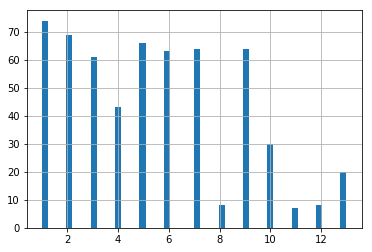

In [171]:
df['toss_winner'].hist(bins=50)

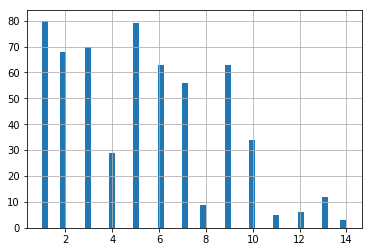

In [173]:
df['winner'].hist(bins=50)

Text(0.5, 1.0, 'Match winners')

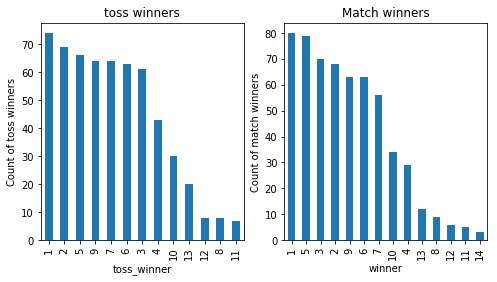

In [176]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('toss_winner')
ax1.set_ylabel('Count of toss winners')
ax1.set_title("toss winners")
temp1.plot(kind='bar')

ax2 = fig.add_subplot(122)
temp2.plot(kind = 'bar')
ax2.set_xlabel('winner')
ax2.set_ylabel('Count of match winners')
ax2.set_title("Match winners")

In [181]:
df.apply(lambda x: sum(x.isnull()),axis=0)
#find the null values in every column

team1            0
team2            0
city             0
toss_decision    0
toss_winner      0
venue            0
winner           0
dtype: int64

In [182]:
#Find cities which are null
df[pd.isnull(df['city'])]

,team1,team2,city,toss_decision,toss_winner,venue,winner


In [183]:
#building predictive model , convert categorical to numerical data
from sklearn.preprocessing import LabelEncoder
var_mod = ['city','toss_decision','venue']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i])
df 

,team1,team2,city,toss_decision,toss_winner,venue,winner
0,2,3,2,1,3,14,2
1,5,9,6,0,5,22,5
2,6,7,9,0,6,8,7
3,1,3,22,0,1,34,3
4,4,2,21,0,4,7,2
5,9,6,16,0,9,26,6
6,4,7,14,0,4,23,7
7,5,1,7,1,1,15,5
8,4,6,14,1,6,23,6
9,9,1,6,1,1,22,9


In [184]:
df.head(2)

,team1,team2,city,toss_decision,toss_winner,venue,winner
0,2,3,2,1,3,14,2
1,5,9,6,0,5,22,5
